In [2]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
sam = sam_model_registry["vit_h"](checkpoint="/home/julius/models/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
predictor.set_image('Datasets/Replica/room0/results/frame000001.jpg')
masks, _, _ = predictor.predict()

AttributeError: 'str' object has no attribute 'shape'

In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam_checkpoint = "/home/julius/models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [12]:
import cv2
image = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000001.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


(680, 1200, 3)


In [13]:
masks = mask_generator.generate(image)

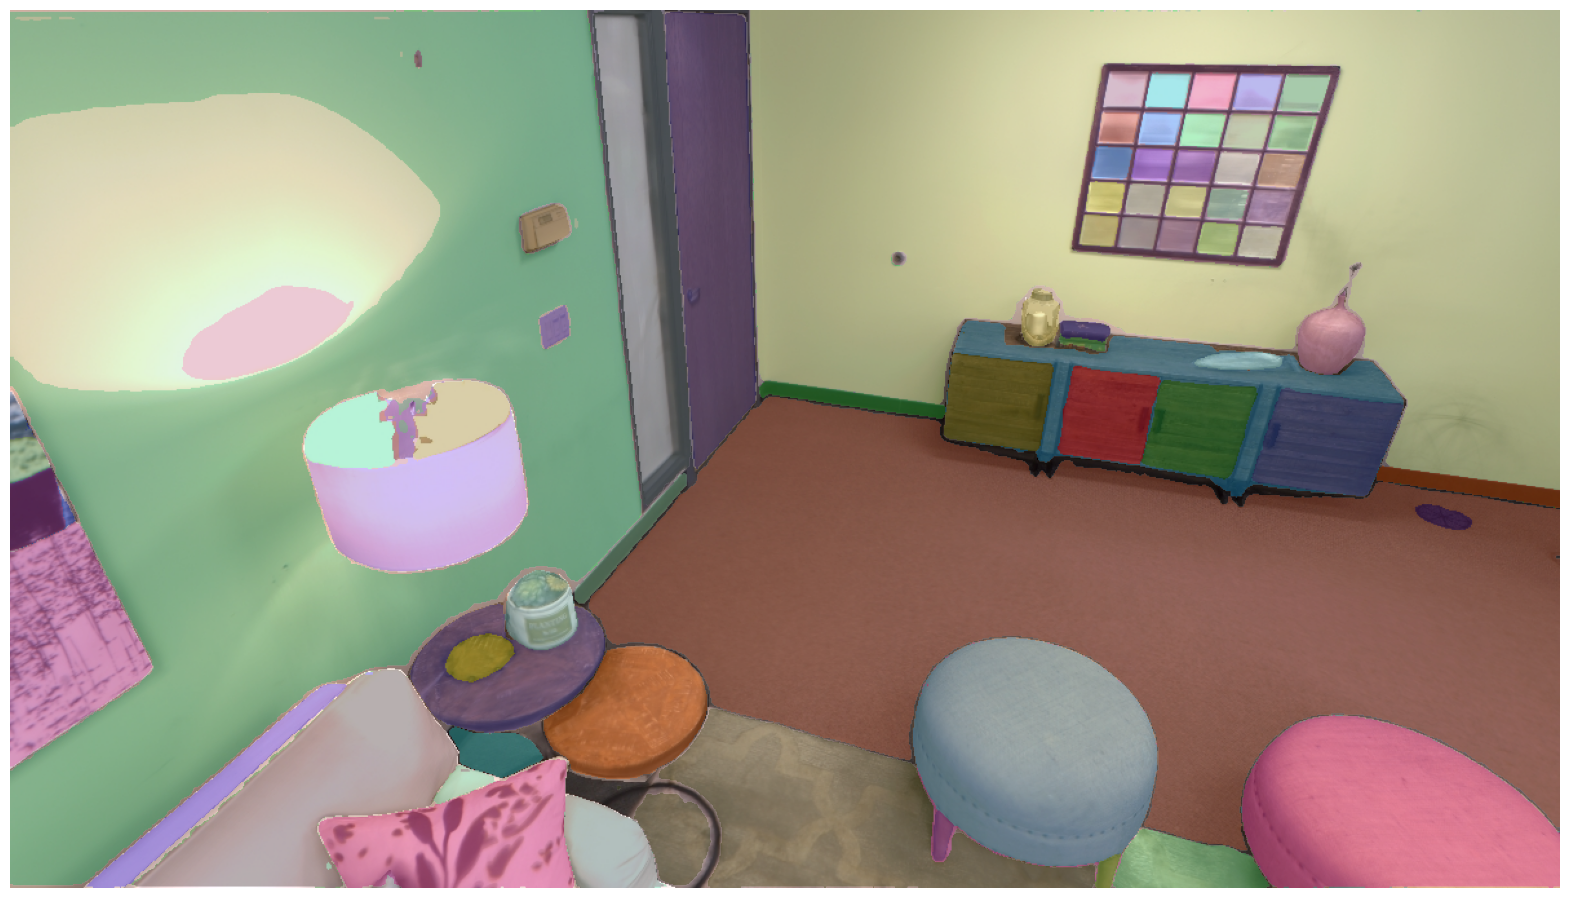

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [16]:
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [21]:
for m in masks:
    print(m.keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', '

In [25]:
masks[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False]]),
 'area': 25700,
 'bbox': [953, 546, 246, 133],
 'predicted_iou': 1.0220232009887695,
 'point_coords': [[956.25, 626.875]],
 'stability_score': 0.9908552169799805,
 'crop_box': [0, 0, 1200, 680]}

In [ ]:
def masks2encoding(masks):
    onehot = np.zeros((masks[0]['segmentation'].shape[0], masks[0]['segmentation'].shape[1], len(masks)))
    for i, e in enumerate(masks):
        encoding = e['segmentation']
        onehot[...,i] = encoding
    return np.argmax(onehot, axis=-1)

In [29]:
onehot = np.zeros((masks[0]['segmentation'].shape[0], masks[0]['segmentation'].shape[1], len(masks)))
for i, e in enumerate(masks):
    encoding = e['segmentation']
    onehot[...,i] = encoding
print(np.argmax(onehot, axis=-1))

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
id = np.argmax(onehot, axis=-1)

In [32]:
np.save('/home/julius/Project/nice-slam/segmentation/data/room0/seg000001.npy', id)